**In this project, we are training classifier to classify transactions as normal or anomaly.**

**It is highly unbalanced data with very low fraction of one class.**

**In his first code, we will use some of the semisupervised methods like fitting a Gaussian distribution or multivariate normal distribution to one class (normal transactions). Then we will classify all datapoints based on the probability of each datapoint coming from this distribution.**

**Importing packages & loading dataset**

In [0]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
import itertools
from pandas.plotting import scatter_matrix

style.use('ggplot')
np.random.seed(42)

import os
os.chdir('C:/Users/dell/Desktop/mmm/anomaly_detection')
dataset = pd.read_csv('creditcard.csv')

print(dataset.shape)
print(dataset.columns)


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [0]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Visualising the distribution of variables**

In [0]:
dataset1=dataset.iloc[:,0:6]

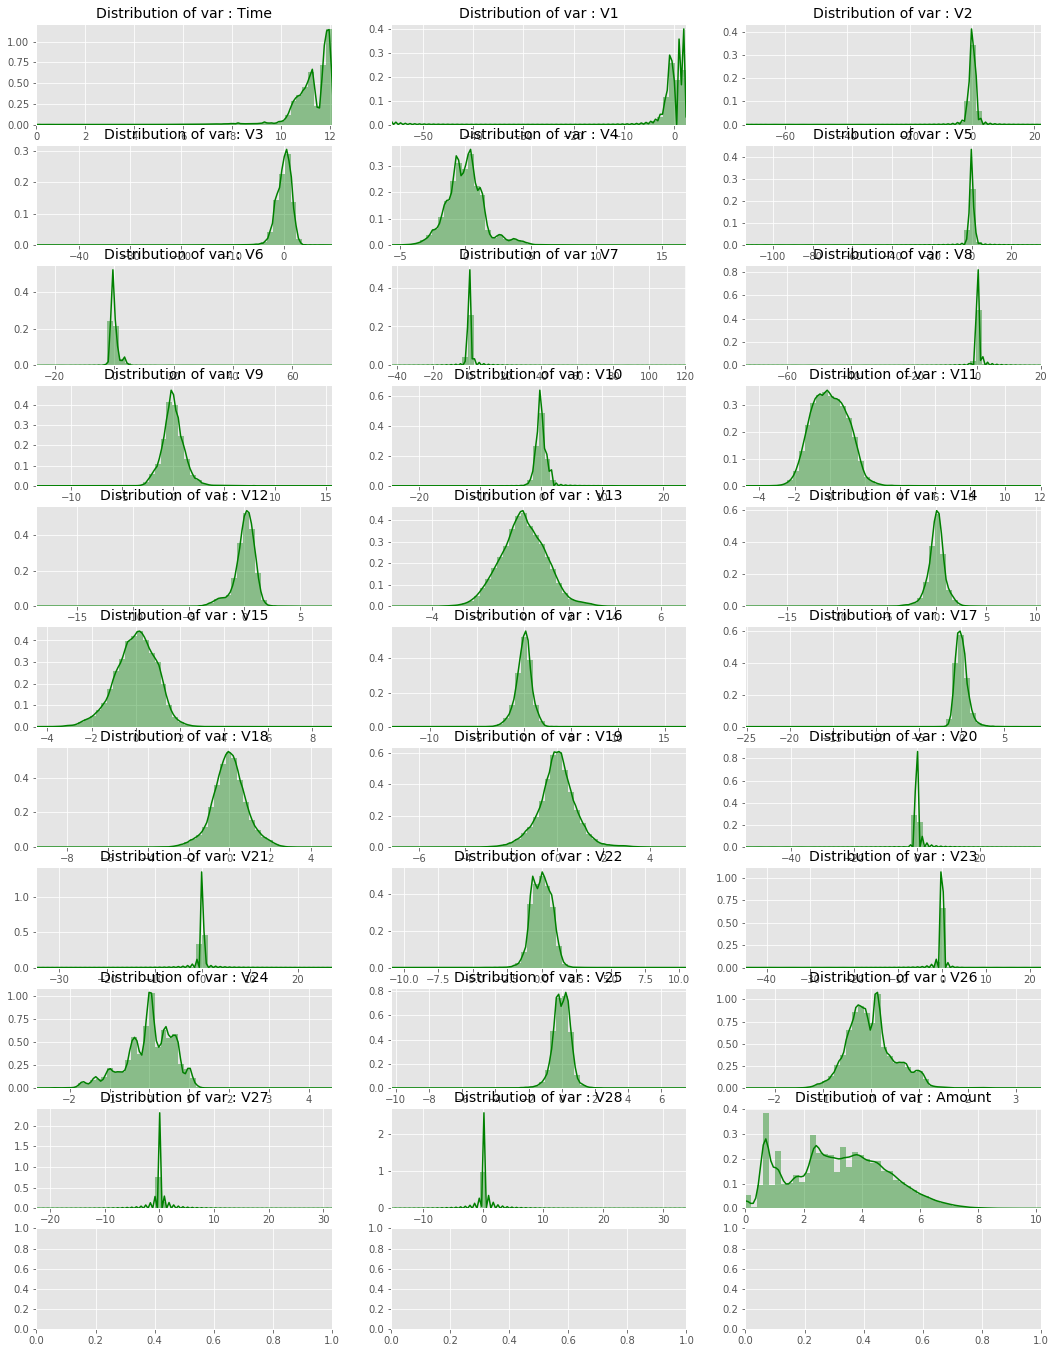

In [0]:
fig, ax = plt.subplots(((dataset.shape[1]-1) // 3 + 1), 3, figsize=(18,24))

j=0
for i in range(dataset.shape[1]-1):
    var_val = dataset.iloc[:,i].values
    var_name = dataset.columns[i]
        
    sns.distplot(var_val, ax=ax[i//3,j], color='g')
    ax[i//3,j].set_title('Distribution of var : ' + var_name, fontsize=14)
    ax[i//3,j].set_xlim([min(var_val), max(var_val)])

    j+=1
    if j == 3:
        j=0

**As expected only time and amount vars are skewed, hence need log transformation**

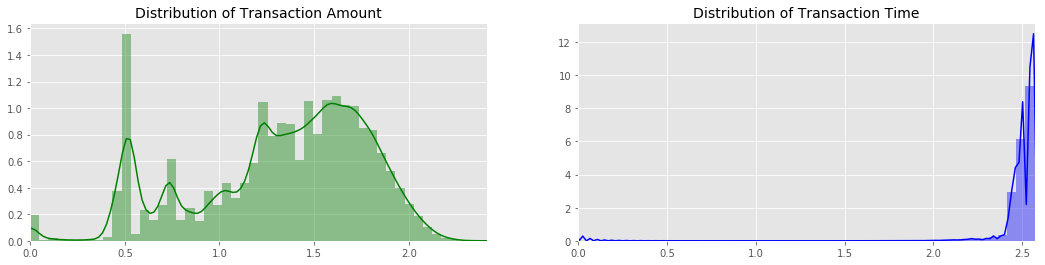

In [0]:
dataset['Amount'] = np.log(dataset['Amount'] + 1)
dataset['Time'] = np.log(dataset['Time'] + 1)

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

**Standardizing the data**

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['Amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

**Defining train, validation & test data.**

In [0]:
normal = dataset[dataset['Class'] == 0]
anomaly = dataset[dataset['Class'] == 1]
print(normal.shape)
print(anomaly.shape)

(284315, 31)
(492, 31)


In [0]:
from sklearn.model_selection import train_test_split

train, normal_test, _, _ = train_test_split(normal, normal, test_size=.9, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly, anomaly, test_size=.5, random_state=42)

train = train.reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

print('Train shape: ', train.shape)
print('Proportion of anomaly in training set: %.2f\n' % train['Class'].mean())
print('Valid shape: ', valid.shape)
print('Proportion of anomaly in validation set: %.2f\n' % valid['Class'].mean())
print('Test shape:, ', test.shape)
print('Proportion of anomaly in test set: %.2f\n' % test['Class'].mean())


Train shape:  (28431, 31)
Proportion of anomaly in training set: 0.00

Valid shape:  (128188, 31)
Proportion of anomaly in validation set: 0.00

Test shape:,  (128188, 31)
Proportion of anomaly in test set: 0.00



**Taking a small sample to visualize TSNE**

In [0]:
np.random.seed(203)

In [0]:
normal = valid[valid['Class']==0].append(test[test['Class']==0]).sample(1000).reset_index(drop=True)
anomaly = valid[valid['Class']==1].append(test[test['Class']==1]).reset_index(drop=True)
data1 = normal.append(anomaly)
X = data1.drop('Class', axis=1)
y = data1['Class']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1492, 30)
y shape:  (1492,)


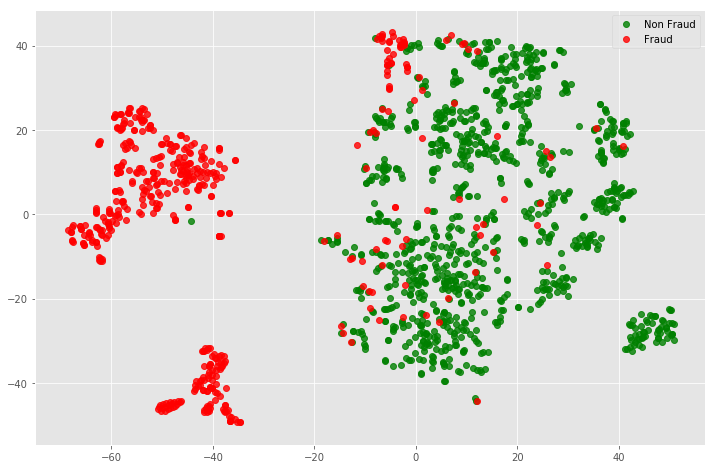

In [0]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y, "original.png")

**Clearly two classes are not easily separable.**

**Let's fit multivariate_normal distribution to one of the class & then classify all transactions into two classes based on a cutoff probability**

In [0]:
from scipy.stats import multivariate_normal

mu = train.drop('Class', axis=1).mean(axis=0).values
sigma = train.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['Class'] == 0].drop('Class', axis=1).values))) 
print(np.median(model.logpdf(valid[valid['Class'] == 1].drop('Class', axis=1).values)))

-32.6805766225644
-510.31803548843845


**Visualize the distribution of the probability that a transaction comes from the fitted multivariate_normal distribution**

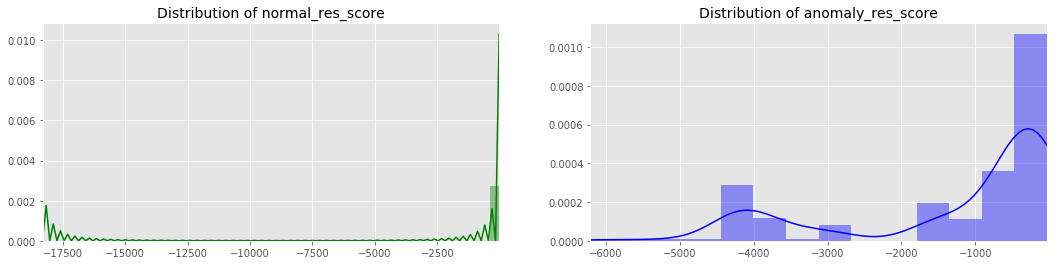

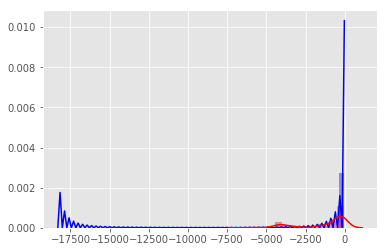

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

normal_res_score = model.logpdf(valid[valid['Class'] == 0].drop('Class', axis=1).values)
anomaly_res_score = model.logpdf(valid[valid['Class'] == 1].drop('Class', axis=1).values)

sns.distplot(normal_res_score, ax=ax[0], color='g')
ax[0].set_title('Distribution of normal_res_score', fontsize=14)
ax[0].set_xlim([min(normal_res_score), max(normal_res_score)])

sns.distplot(anomaly_res_score, ax=ax[1], color='b')
ax[1].set_title('Distribution of anomaly_res_score', fontsize=14)
ax[1].set_xlim([min(anomaly_res_score), max(anomaly_res_score)])
plt.show()

sns.distplot(normal_res_score, color='b')
sns.distplot(anomaly_res_score, color='r')
plt.show()

#Clear that not well separated

**Checking the performance of this classifier based on precision, recall & confusion_matrix**

In [0]:
tresholds = np.linspace(-1000,-10, 150)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('Class', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5683311432325887 110


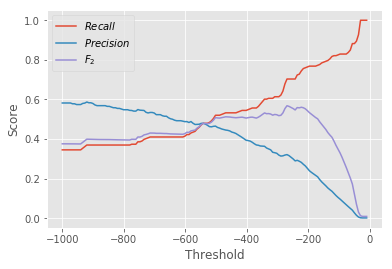

In [0]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [0]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
print(cnf_matrix)

Final threshold: -269
Test Recall Score: 0.736
Test Precision Score: 0.354
Test F2 Score: 0.605
[[127612    330]
 [    65    181]]


**Let's fit GaussianMixture distribution to one of the class & then classify all transactions into two classes based on a cutoff probability**

In [0]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(train.drop('Class', axis=1).values)
print(gmm.score(valid[valid['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(valid[valid['Class'] == 1].drop('Class', axis=1).values))

11.522399492882087
-185.52353501303102


**Visualize the distribution of the probability that a transaction comes from the fitted GaussianMixture distribution**

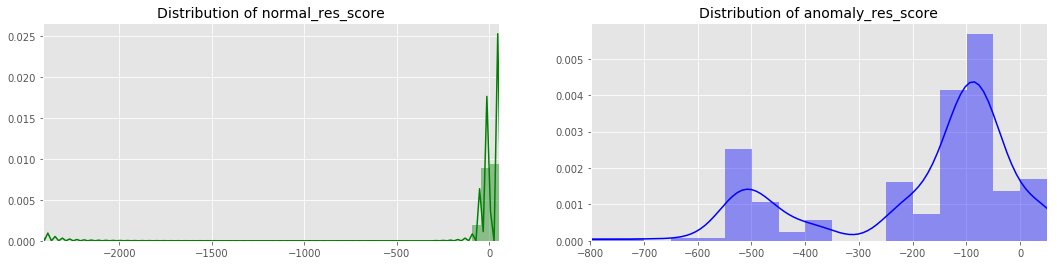

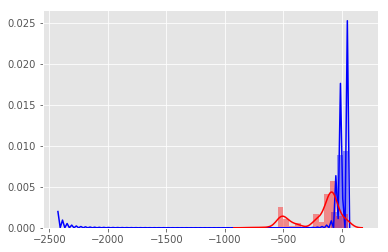

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

normal_res_score = gmm.score_samples(valid[valid['Class'] == 0].drop('Class', axis=1).values)
anomaly_res_score = gmm.score_samples(valid[valid['Class'] == 1].drop('Class', axis=1).values)

sns.distplot(normal_res_score, ax=ax[0], color='g')
ax[0].set_title('Distribution of normal_res_score', fontsize=14)
ax[0].set_xlim([min(normal_res_score), max(normal_res_score)])

sns.distplot(anomaly_res_score, ax=ax[1], color='b')
ax[1].set_title('Distribution of anomaly_res_score', fontsize=14)
ax[1].set_xlim([min(anomaly_res_score), max(anomaly_res_score)])

plt.show()

sns.distplot(normal_res_score, color='b')
sns.distplot(anomaly_res_score, color='r')
plt.show()

#Clear that not well separated

**Checking the performance of this classifier based on precision, recall & confusion_matrix**

In [0]:
tresholds = np.linspace(-400, 0, 100)
y_scores = gmm.score_samples(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5305232558139537 76


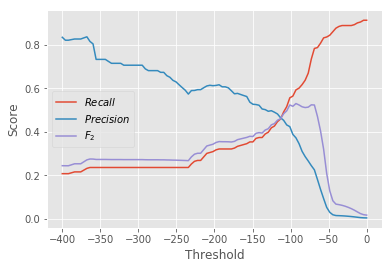

In [0]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [0]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (gmm.score_samples(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
print(cnf_matrix)


Final threshold: -92.929293
Test Recall Score: 0.598
Test Precision Score: 0.395
Test F2 Score: 0.542
[[127717    225]
 [    99    147]]
